### 這個程式碼是目前最新的版本
### 裡面包含以下幾個項目
##### soyborn 的 箱子圖
##### cross_validation 的程式碼
##### pca_data 的轉形
##### make data balanced 
###### 1. 可以處理非連續的class

In [5]:
import pandas as pd
import os 
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.decomposition import RandomizedPCA
from sklearn.learning_curve import learning_curve

import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import csv
from sklearn import svm
import numpy as np
from sklearn import neighbors
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
import math
import pylab as pl
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
import seaborn

print('成功')

成功


In [6]:
def plot_box_RandomForest(data,n):
    seaborn.boxplot(x='V',y='S',data = data)
    plt.xlabel('number of trees')
    plt.ylabel('Classification scores')
    plt.show
    plt.xlim(0,n+1)
    plt.ylim(0,1)
    plt.show(block=True)

In [7]:
def read_data():#list comprehension
    with open('地區資訊new.csv', 'r') as f:  #opens PW file #她可以幫忙協助關閉程式
        reader = csv.reader(f)
        di = list(list(rec) for rec in csv.reader(f, delimiter=',')) #reads csv into a list of lists
        f.close()
    di.remove(di[0])
    return di

def data_organization(buffer, dia, n_start, n_multi, n_time):
    print('data_organization_',n_start,' ** ',n_multi, n_time)
    while [] in buffer:
        buffer.remove([])
    input_x=[]
    real_y=[]
    for buffera in buffer:
        buffera[0] = dia[0]
        buffera[1] = dia[1]
        
        range_level = []
        range_level.append(0)
        for i in range(n_time):
            range_level.append(n_start*pow(n_multi,i))
        range_level[-1]=(10000)
        for i in range(n_time):
            if float(buffera[5]) < range_level[i+1] and float(float(buffera[5])) >= range_level[i]:
                buffera[5] = str(i)
        
        input_x.append(buffera[7:])
        real_y.append(float(buffera[5]))
        
    buffer_a = []
    buffer_b = []
    min_length=50
    max_length=30
    for element in input_x:
        if len(element) < min_length:
            min_length = len(element)
        if len(element) > max_length:
            max_length = len(element)
        for elementa in element:
            #print(type(elementa))
            if elementa == '':
                buffer_a.append(0)
            elif elementa == 'X' or elementa =='T':
                buffer_a.append(0)
            else:
                buffer_a.append(float(elementa))
        buffer_b.append(buffer_a)
        buffer_a = []
    for element in buffer_b:
        while len(element) != max_length:
            element.append(0)
    X = np.array(buffer_b)
    y = np.array(real_y)
    return X, y

print('成功')

def open_data(filename, dia, n_start, n_multi, n_time):

    print(filename)
    with open(filename,'r',encoding='utf-8', errors='ignore') as f:
        reader = csv.reader(f)
        buffer = list(list(rec) for rec in csv.reader(f, delimiter=',')) #reads csv into a list of lists
        f.close()
    X, y = data_organization(buffer, dia, n_multi, n_start, n_time)
    return X, y

def PCA_data(X,n_compo):
    print('running PCA with n_component = ' + str(n_compo))
    cov_mat = np.cov(X.T)
    eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
    
    for i in range(len(eigen_vals)):
        if eigen_vals[i].imag != 0:
            np.delete(eigen_vals,i)
            np.delete(eigen_vecs,i)
    eigen_vals = eigen_vals.real
    
    tot = sum(eigen_vals)
    var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)
    
    counter = 0
    for i in cum_var_exp:
        counter = counter+1
        if i>0.8:
            Num_Pca_Over80 = counter
            break
    if n_compo == 'Pca_Over80':
        pca = RandomizedPCA(n_components=Num_Pca_Over80)
    else:
        pca = RandomizedPCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    return X_pca
    

成功


In [15]:
def rawX_to_plotbox(X, y, n_cv,days):
    
    if days == 7:
        for row_X in X:
            #print(row_X)
            #print(type(row_X))
            #print(row_X.shape)
            np.delete(row_X, np.s_[-15:])
            
    if days == 8:
        for row_X in X:
            np.delete(row_X, np.s_[-10:])
    if days == 9:
        for row_X in X:
            np.delete(row_X, np.s_[-5:])

    data = X
    k = pd.DataFrame(data=data[0:,0:],    # values
                  index=range(len(data[0:])),    # 1st column as index
                  columns=range(len(data[0])) )


    if 1:
        scores = []
        DF = pd.DataFrame(columns=list('VS'))
        #-------------------RandomForset
        n = 50
        for val in range(1,n):
            clf = RandomForestClassifier(n_estimators = val)    
            try:
                validated = cross_val_score(clf, data, y, cv=n_cv)
            except:
                print('Error')
            #else:
            #    print('能怎麼辦呢??')
                
            #print(y[-10:])
            for count_cv in range(1,n_cv):
                DF2=pd.DataFrame([[val, validated[count_cv]]], columns=list('VS'))
                DF = DF.append(DF2, ignore_index=True)
        #--------------------SVM
        clf = SVC(class_weight='balanced')
        try:
            validated = cross_val_score(clf, data, y, cv=n_cv)
            #print(clf.fit(X[:-10],y[:-10]).score(X[:-10],y[:-10]), accuracy_score(clf.fit(X[:-10],y[:-10]).predict(X[-10:]),y[-10:]))
        except:
            print('???error')
            print(y)
            print('你覺得應該怎麼做呢??')
            return
            
        for count_cv in range(1,n_cv):
            DF2=pd.DataFrame([[50, validated[count_cv]]], columns=list('VS'))
            DF = DF.append(DF2, ignore_index=True)
            
        plt.title('RandomForest')
        plot_box_RandomForest(DF,n)
    else:
        print('fail to draw, please re examine your input')

print('完成')

完成


In [9]:
def make_data_balanced(X,y):
    X = np.array(X)
    y = np.array(y)
    uni_class = np.unique(y)
    
    if len(uni_class) == 2:
        buffer_X,buffer_y = make_data_balanced_2(X,y)
    elif len(uni_class) == 1:
        print('天啊，我竟然也遇到這個狀況......那就不處理，直接送出去')
        buffer_X = X
        buffer_y = y
    else:
        ratio = ration(y)
        X = X.tolist()
        y = y.tolist()
        buffer_X = X
        buffer_y = y
        while ratio > 2:
            uni_class, uni_class_voting, max_index, min_index, ratio = ration_oo(y)
            
            for i in range(len(y)):
                if y[i] == uni_class[min_index]:
                    for repeat in range(int(ratio)):
                        buffer_X.append(X[i]) 
                        buffer_y.append(y[i])
            
            ratio = ration(buffer_y)
    buffer_X = np.array(buffer_X)
    buffer_y = np.array(buffer_y)
    return buffer_X, buffer_y
            
def make_data_balanced_2(X,y):
    y = np.array(y)
    X = np.array(X)
    uni_class, uni_class_voting, max_index, min_index, ratio = ration_oo(y)
    if len(uni_class) == 2:#基本上會是2，除非不是透過make_data_balanced()呼叫
        # y的值
        # class的值 ============== uni_class
        # class的各數 ============ uni_class_voting
        # 最大與最小class的index == max
        buffer_X = []
        buffer_y = []
        X = X.tolist()
        if ratio >= 2:
            for i in range(len(y)):
                if y[i] == uni_class[min_index]:
                    for repeat in range(int(ratio)):
                        buffer_X.append(X[i])
                        buffer_y.append(y[i])
                else:
                    buffer_X.append(X[i])
                    buffer_y.append(y[i])
        buffer_X = np.array(buffer_X)
        buffer_y = np.array(buffer_y)
    else:
        buffer_X = np.array(X)
        buffer_y = np.array(y)
        
        
    return buffer_X, buffer_y

def ration_oo(y):
    y = np.array(y).astype(int)
    uni_class = np.unique(y)
    uni_class_voting = np.bincount(y)
    
    index = (uni_class_voting == 0)
    buffer = []
    for i in range(len(uni_class_voting)):
        if not index[i]:
            buffer.append(uni_class_voting[i])
    uni_class_voting = np.array(buffer)
    
    max_index = np.argmax(uni_class_voting)
    min_index = np.argmin(uni_class_voting)

    ratio = uni_class_voting[max_index]/uni_class_voting[min_index]
    ratio = int(round(ratio))
    
    return uni_class, uni_class_voting, max_index, min_index, ratio
def ration(y):
    y = np.array(y).astype(int)
    uni_class = np.unique(y)
    uni_class_voting = np.bincount((y))
    
    index = (uni_class_voting == 0)
    buffer = []
    for i in range(len(uni_class_voting)):
        if not index[i]:
            buffer.append(uni_class_voting[i])
    uni_class_voting = np.array(buffer)
    
    max_index = np.argmax(uni_class_voting)
    min_index = np.argmin(uni_class_voting)

    ratio = uni_class_voting[max_index]/uni_class_voting[min_index]
    ratio = int(round(ratio))
    
    return ratio

C:\Users\Aaron\weather\東方果實蠅台中市石岡區.csv
data_organization_ 4  **  4 3


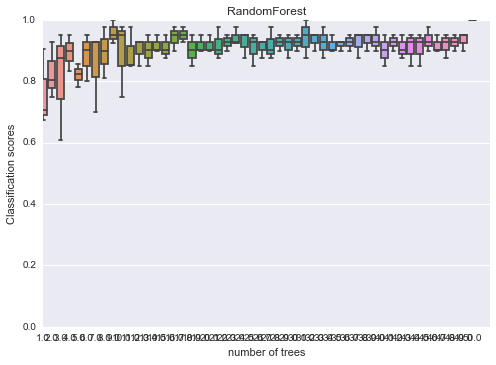

[[   1.    21.3   24.2 ...,   30.    21.4  190. ]
 [  21.    26.1   31.8 ...,   25.3   18.3  261. ]
 [  11.    21.1   25.1 ...,   28.2   18.9  304. ]
 ..., 
 [  21.    21.9   24.6 ...,   30.5   23.6  181. ]
 [  21.    21.9   24.6 ...,   30.5   23.6  181. ]
 [  21.    21.9   24.6 ...,   30.5   23.6  181. ]]
成功
C:\Users\Aaron\weather\東方果實蠅台中市后里區.csv
data_organization_ 4  **  4 3
天啊，我竟然也遇到這個狀況......那就不處理，直接送出去
???error
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
你覺得應該怎麼做呢??
[[  11.    24.    26.8 ...,   28.9   22.7   12. ]
 [   1.    22.7   25.3 ...,   30.8   22.9  201. ]
 [  21.    26.8   32.4 ...,   25.9   19.9   29. ]
 ..., 
 [   0.     0.     0.  ...,    0.     0.     0. ]
 [   0.     0.     0.  ...,    0.     0.     0. ]
 [   1.    26.    28.7 ...,    0.     0.     0. ]]
成功
C:\Users\Aaron\weather\東方果實蠅台中市和平區.csv
data_organization_ 4  **  4 3


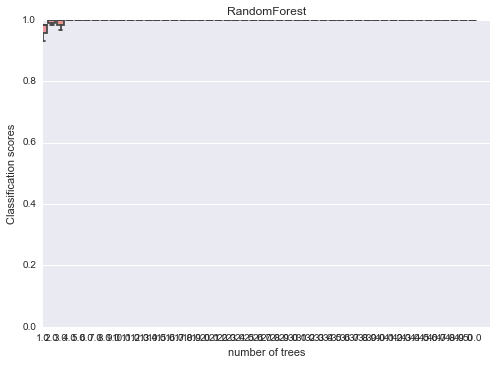

[[  11.    24.7   27.7 ...,    0.     0.    28. ]
 [   1.    22.5   25.4 ...,    0.     0.   171. ]
 [  21.    27.2   32.7 ...,   25.3   19.5  285. ]
 ..., 
 [  21.    18.6   24.9 ...,   22.    12.    34. ]
 [  11.    15.4   19.9 ...,   20.5   10.7  324. ]
 [   1.    13.6   15.8 ...,   17.7   12.2   11. ]]
成功
C:\Users\Aaron\weather\東方果實蠅台中市東勢區.csv
data_organization_ 4  **  4 3


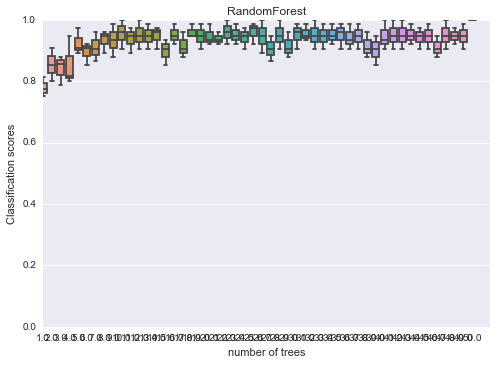

[[  11.    24.1   27.5 ...,   28.5   21.7  132. ]
 [   1.    21.3   24.2 ...,   30.    21.4  190. ]
 [  21.    26.1   31.8 ...,   25.3   18.3  261. ]
 ..., 
 [   1.    12.7   14.9 ...,   18.    11.6   10. ]
 [   1.    12.7   14.9 ...,   18.    11.6   10. ]
 [   1.    12.7   14.9 ...,   18.    11.6   10. ]]
成功
C:\Users\Aaron\weather\東方果實蠅台東縣台東地區.csv
data_organization_ 4  **  4 3


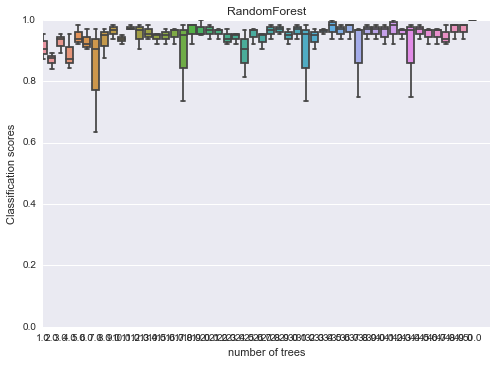

[[  11.    24.2   27.8 ...,   29.8   24.   360. ]
 [   1.    25.7   29.9 ...,   35.3   26.2  190. ]
 [  11.    23.3   27.6 ...,   30.5   22.8  330. ]
 ..., 
 [   1.    30.    33.9 ...,   33.    27.7   50. ]
 [   1.    30.    33.9 ...,   33.    27.7   50. ]
 [   1.    30.    33.9 ...,   33.    27.7   50. ]]
成功
C:\Users\Aaron\weather\東方果實蠅台南市大內區.csv
data_organization_ 4  **  4 3


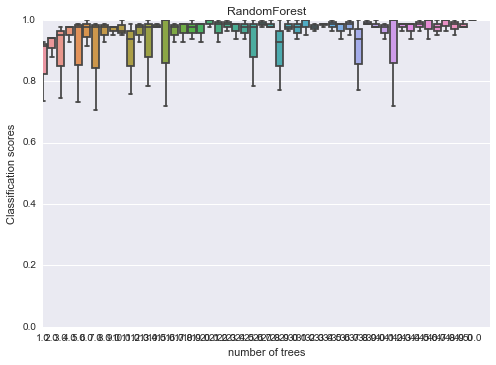

[[  11.    24.6   30.1 ...,   33.2   22.6  349. ]
 [   1.    24.6   39.5 ...,   34.1   23.7   13. ]
 [  21.    27.5   34.2 ...,   31.2   20.2   57. ]
 ..., 
 [  11.    25.9   33.  ...,   30.2   22.5   65. ]
 [  11.    25.9   33.  ...,   30.2   22.5   65. ]
 [  11.    25.9   33.  ...,   30.2   22.5   65. ]]
成功
C:\Users\Aaron\weather\東方果實蠅台南市玉井區.csv
data_organization_ 4  **  4 3


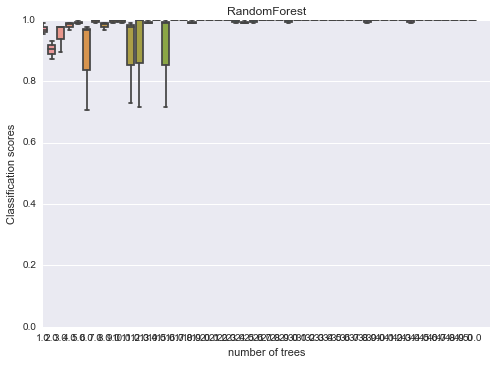

[[  11.    24.6   30.1 ...,   33.2   22.6  349. ]
 [   1.    24.6   39.5 ...,   34.1   23.7   13. ]
 [  21.    27.5   34.2 ...,   31.2   20.2   57. ]
 ..., 
 [  11.    25.9   33.  ...,   30.2   22.5   65. ]
 [  11.    25.9   33.  ...,   30.2   22.5   65. ]
 [  11.    25.9   33.  ...,   30.2   22.5   65. ]]
成功
C:\Users\Aaron\weather\東方果實蠅台南市官田區.csv
data_organization_ 4  **  4 3


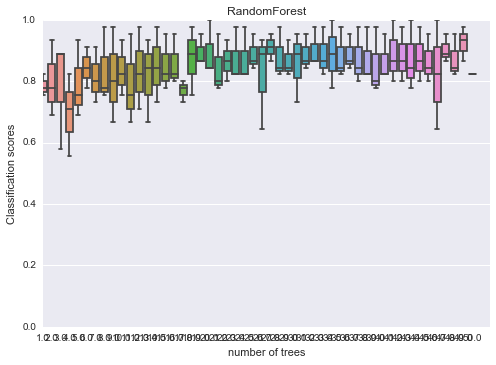

[[  11.    26.1   31.1 ...,   33.5   24.4   15. ]
 [   1.    25.2   29.1 ...,   34.    24.8  139. ]
 [  21.    28.5   32.8 ...,   30.6   21.1  315. ]
 ..., 
 [   1.    20.1   27.7 ...,   13.5    9.3    8. ]
 [   1.    20.1   27.7 ...,   13.5    9.3    8. ]
 [   1.    20.1   27.7 ...,   13.5    9.3    8. ]]
成功
C:\Users\Aaron\weather\東方果實蠅台南市東山區.csv
data_organization_ 4  **  4 3


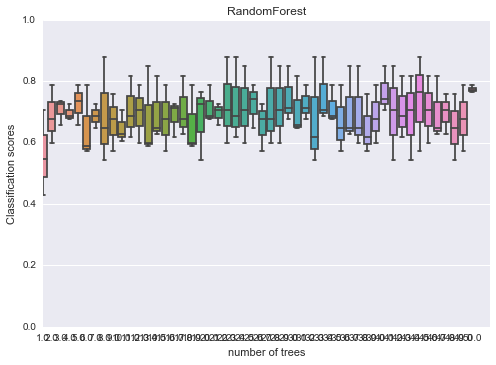

[[  11.    24.6   30.1 ...,   33.2   22.6  349. ]
 [   1.    24.6   39.5 ...,   34.1   23.7   13. ]
 [  21.    27.5   34.2 ...,   31.2   20.2   57. ]
 ..., 
 [  11.    16.1   26.7 ...,   24.4    6.3  257. ]
 [  11.    16.1   26.7 ...,   24.4    6.3  257. ]
 [  11.    16.1   26.7 ...,   24.4    6.3  257. ]]
成功
C:\Users\Aaron\weather\東方果實蠅台南市南化區.csv
data_organization_ 4  **  4 3


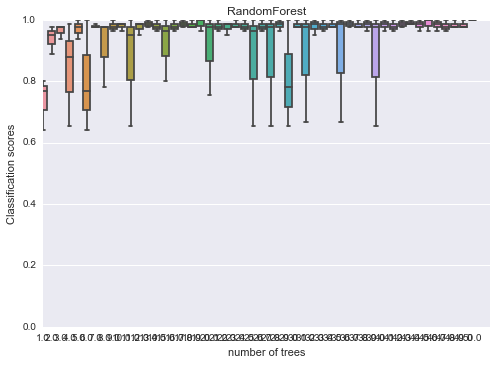

[[  11.    21.3   24.7 ...,   28.2   22.7  100. ]
 [   1.    22.9   26.5 ...,   31.1   24.3   40. ]
 [  21.    26.1   30.6 ...,   26.    19.5  310. ]
 ..., 
 [  21.    12.7   13.4 ...,   15.8   11.9  250. ]
 [  21.    12.7   13.4 ...,   15.8   11.9  250. ]
 [  21.    12.7   13.4 ...,   15.8   11.9  250. ]]
成功
C:\Users\Aaron\weather\東方果實蠅宜蘭縣冬山鄉.csv
data_organization_ 4  **  4 3


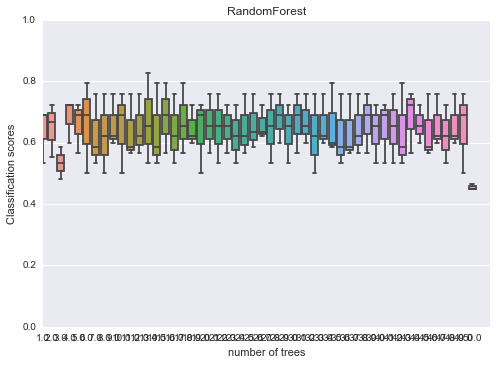

[[  11.    21.4   23.7 ...,   29.3   22.6  118. ]
 [   1.    22.8   27.5 ...,   33.    23.5  327. ]
 [  21.    26.7   32.8 ...,   26.2   19.1   44. ]
 ..., 
 [  21.    19.8   24.6 ...,   21.5   12.2   52. ]
 [  11.    15.9   18.8 ...,   25.6   12.3  124. ]
 [   1.    13.    14.1 ...,   14.4   13.1  273. ]]
成功
C:\Users\Aaron\weather\東方果實蠅宜蘭縣員山鄉.csv
data_organization_ 4  **  4 3


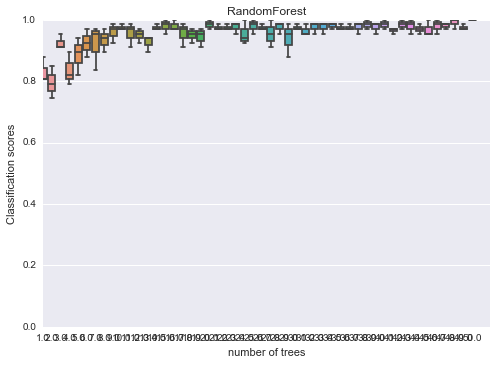

[[  11.    17.3   20.9 ...,   25.5   18.6   56. ]
 [   1.    19.1   23.6 ...,   28.8   20.4  237. ]
 [  21.    23.1   28.6 ...,   22.8   15.7  232. ]
 ..., 
 [   1.     9.7   11.3 ...,    0.     0.     0. ]
 [   1.     9.7   11.3 ...,    0.     0.     0. ]
 [   1.     9.7   11.3 ...,    0.     0.     0. ]]
成功
C:\Users\Aaron\weather\東方果實蠅宜蘭縣頭城鎮.csv
data_organization_ 4  **  4 3


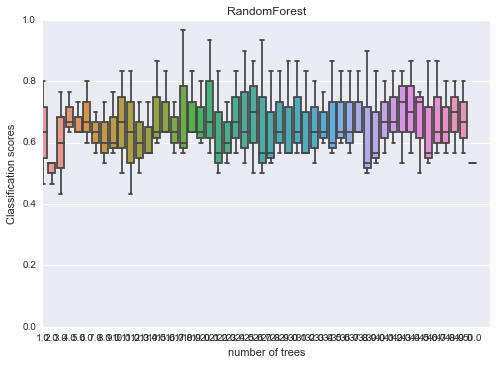

[[  11.    21.2   25.2 ...,   27.6   22.3  281. ]
 [  11.    21.2   25.2 ...,   27.6   22.3  281. ]
 [  21.    26.1   30.3 ...,   25.9   19.6  317. ]
 ..., 
 [  21.    19.8   23.5 ...,   27.5   11.6   61. ]
 [  11.    16.5   32.5 ...,   24.2   13.6    8. ]
 [   1.    13.1   14.2 ...,   17.2   12.4   43. ]]
成功
C:\Users\Aaron\weather\東方果實蠅花蓮縣玉溪地區.csv
data_organization_ 4  **  4 3


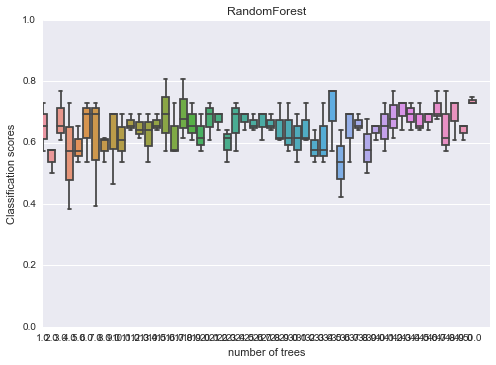

[[   1.    23.8   30.3 ...,   33.7   24.3  165. ]
 [  21.    17.8   19.7 ...,   20.6   15.7   95. ]
 [  11.    13.5   16.3 ...,   21.2   16.7   19. ]
 ..., 
 [  21.    23.4   29.1 ...,   24.6   17.1    1. ]
 [  21.    23.4   29.1 ...,   24.6   17.1    1. ]
 [  21.    23.4   29.1 ...,   24.6   17.1    1. ]]
成功
C:\Users\Aaron\weather\東方果實蠅花蓮縣花蓮市.csv
data_organization_ 4  **  4 3


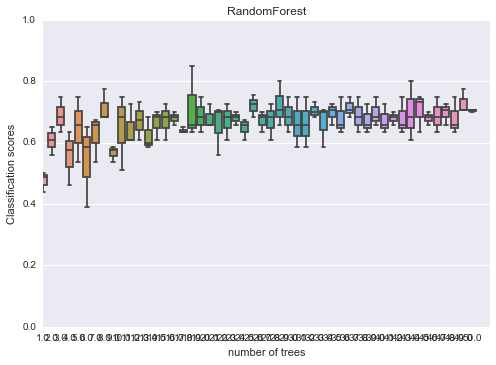

[[  11.    23.    26.5 ...,   27.9   23.4  340. ]
 [   1.    23.7   26.9 ...,   30.9   26.1   20. ]
 [  21.    26.8   29.8 ...,   27.6   20.8  240. ]
 ..., 
 [   1.    14.3   15.7 ...,   19.5   15.6   40. ]
 [   1.    14.3   15.7 ...,   19.5   15.6   40. ]
 [   1.    14.3   15.7 ...,   19.5   15.6   40. ]]
成功
C:\Users\Aaron\weather\東方果實蠅花蓮縣富里鄉.csv
data_organization_ 4  **  4 3


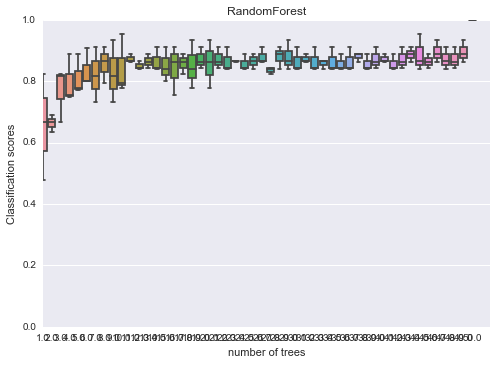

[[   1.    24.7   28.1 ...,   29.9   25.6  200. ]
 [  21.    26.8   29.  ...,   27.3   21.   330. ]
 [  11.    22.3   23.9 ...,   29.1   21.5  190. ]
 ..., 
 [  21.    29.    31.  ...,   32.3   26.3  340. ]
 [  21.    29.    31.  ...,   32.3   26.3  340. ]
 [  21.    29.    31.  ...,   32.3   26.3  340. ]]
成功
C:\Users\Aaron\weather\東方果實蠅花蓮縣瑞穗鄉.csv
data_organization_ 4  **  4 3


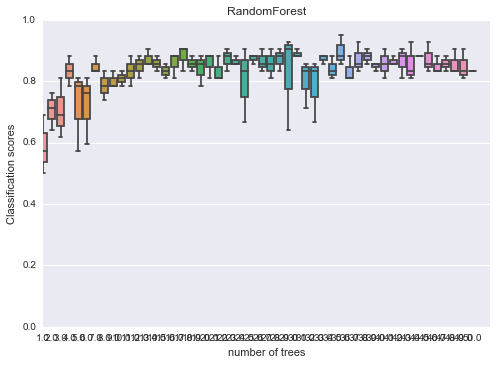

[[  11.    21.3   24.7 ...,   28.8   22.2  347. ]
 [  21.    26.8   32.1 ...,   24.5   17.4   85. ]
 [  11.    21.2   26.4 ...,   31.1   18.6  113. ]
 ..., 
 [   1.    28.3   33.9 ...,   33.1   23.7  333. ]
 [   1.    28.3   33.9 ...,   33.1   23.7  333. ]
 [   1.    28.3   33.9 ...,   33.1   23.7  333. ]]
成功
C:\Users\Aaron\weather\東方果實蠅金門縣金門地區.csv
data_organization_ 4  **  4 3


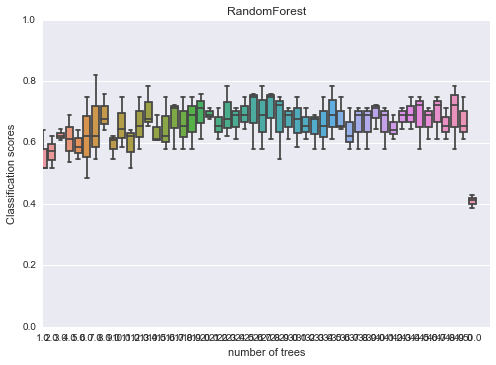

[[  11.    21.7   24.6 ...,   26.6   20.3   60. ]
 [   1.    20.1   23.8 ...,   26.8   23.4  220. ]
 [  21.    21.2   24.3 ...,   21.5   15.1   30. ]
 ..., 
 [  21.    17.    20.6 ...,   21.6   11.    40. ]
 [  11.    13.4   17.8 ...,   19.8   10.4   20. ]
 [   1.    11.2   13.7 ...,   15.     9.9   50. ]]
成功
C:\Users\Aaron\weather\東方果實蠅南投縣中寮鄉.csv
data_organization_ 4  **  4 3


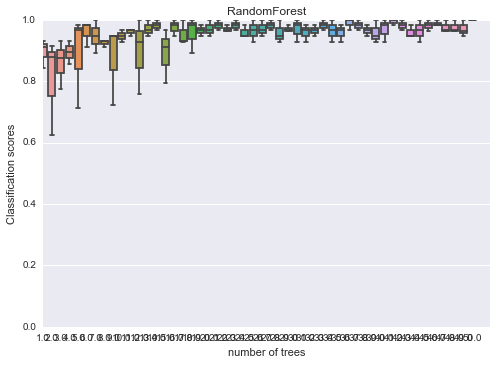

[[   1.    21.5   24.9 ...,   33.6   22.5  135. ]
 [  21.    17.3   19.3 ...,   28.1   12.6   75. ]
 [  21.    16.2   21.9 ...,    0.     0.     0. ]
 ..., 
 [  11.    15.8   21.1 ...,   23.6   10.   284. ]
 [  11.    15.8   21.1 ...,   23.6   10.   284. ]
 [  11.    15.8   21.1 ...,   23.6   10.   284. ]]
成功
C:\Users\Aaron\weather\東方果實蠅南投縣水里鄉.csv
data_organization_ 4  **  4 3


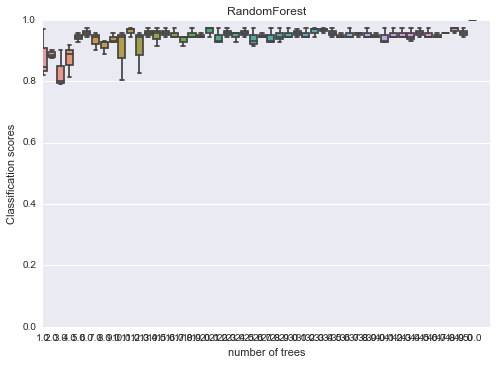

[[  11.    20.7   25.9 ...,   25.6   19.2  330. ]
 [   1.    18.3   20.7 ...,   27.    19.1  290. ]
 [  21.    23.    28.7 ...,   22.2   16.7  350. ]
 ..., 
 [   1.    10.9   14.4 ...,   16.2   11.1  130. ]
 [   1.    10.9   14.4 ...,   16.2   11.1  130. ]
 [   1.    10.9   14.4 ...,   16.2   11.1  130. ]]
成功
C:\Users\Aaron\weather\東方果實蠅南投縣埔里鎮.csv
data_organization_ 4  **  4 3


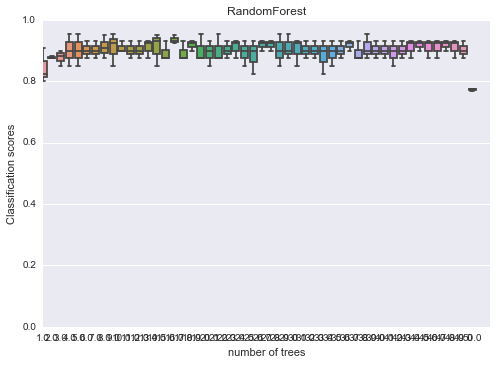

[[  11.    20.7   25.9 ...,   25.6   19.2  330. ]
 [  11.    17.9   22.6 ...,   27.4   17.7  340. ]
 [   1.    18.6   22.9 ...,   26.    16.   290. ]
 ..., 
 [   1.    21.9   25.9 ...,   28.7   20.6  300. ]
 [   1.    21.9   25.9 ...,   28.7   20.6  300. ]
 [   1.    21.9   25.9 ...,   28.7   20.6  300. ]]
成功
C:\Users\Aaron\weather\東方果實蠅屏東縣里港鄉.csv
data_organization_ 4  **  4 3


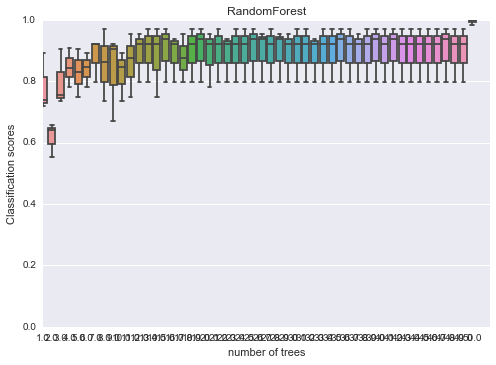

[[  11.    25.9   30.3 ...,   33.7   23.9  111. ]
 [   1.    27.    31.5 ...,   36.5   25.   116. ]
 [  21.    28.9   34.6 ...,   31.6   21.7  115. ]
 ..., 
 [   1.    17.2    0.  ...,    0.     0.   310. ]
 [   1.    17.2    0.  ...,    0.     0.   310. ]
 [   1.    17.2    0.  ...,    0.     0.   310. ]]
成功
C:\Users\Aaron\weather\東方果實蠅屏東縣佳冬鄉.csv
data_organization_ 4  **  4 3


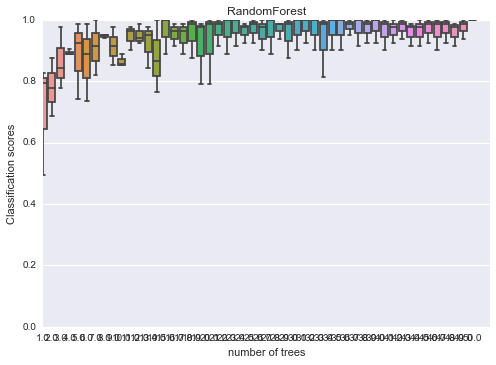

[[  11.    24.3    0.  ...,    0.     0.    39. ]
 [   1.    26.8   31.4 ...,   33.3   24.1  123. ]
 [  21.    28.2   33.1 ...,   28.6   22.3   45. ]
 ..., 
 [  11.    23.6   26.  ...,   22.7   18.1   49. ]
 [  11.    23.6   26.  ...,   22.7   18.1   49. ]
 [  11.    23.6   26.  ...,   22.7   18.1   49. ]]
成功
C:\Users\Aaron\weather\東方果實蠅屏東縣枋山地區.csv
data_organization_ 4  **  4 3


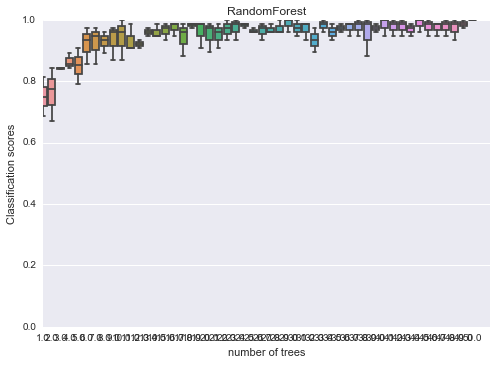

[[  11.    24.3    0.  ...,    0.     0.    39. ]
 [   1.    26.8   31.4 ...,   33.3   24.1  123. ]
 [  21.    28.2   33.1 ...,   28.6   22.3   45. ]
 ..., 
 [   1.    20.1   23.3 ...,   23.7   18.7   47. ]
 [   1.    20.1   23.3 ...,   23.7   18.7   47. ]
 [   1.    20.1   23.3 ...,   23.7   18.7   47. ]]
成功
C:\Users\Aaron\weather\東方果實蠅屏東縣枋寮地區.csv
data_organization_ 4  **  4 3


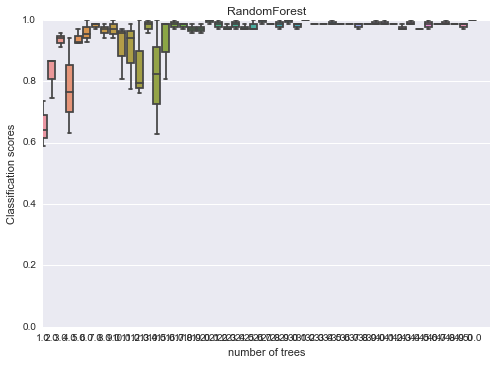

[[  11.    24.3    0.  ...,    0.     0.    39. ]
 [  11.    23.1   26.4 ...,   31.    24.4   30. ]
 [  21.    22.8   26.3 ...,   27.9   20.4   47. ]
 ..., 
 [  21.    28.    32.  ...,   29.1   24.8  208. ]
 [  21.    28.    32.  ...,   29.1   24.8  208. ]
 [  21.    28.    32.  ...,   29.1   24.8  208. ]]
成功
C:\Users\Aaron\weather\東方果實蠅屏東縣長治鄉.csv
data_organization_ 4  **  4 3


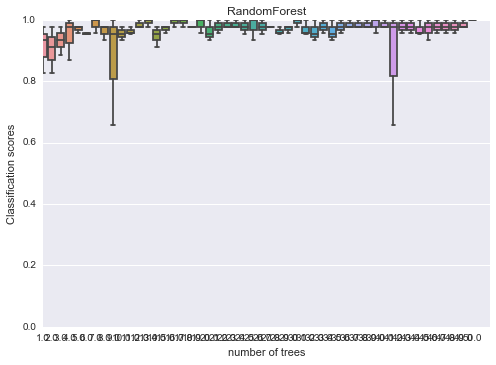

[[  11.    25.9   30.5 ...,   33.2   24.4   24. ]
 [   1.    26.7    0.  ...,    0.     0.    36. ]
 [  21.    28.3    0.  ...,    0.     0.   216. ]
 ..., 
 [   1.    28.6   33.7 ...,    0.     0.    16. ]
 [   1.    28.6   33.7 ...,    0.     0.    16. ]
 [   1.    28.6   33.7 ...,    0.     0.    16. ]]
成功
C:\Users\Aaron\weather\東方果實蠅屏東縣高樹鄉.csv
data_organization_ 4  **  4 3


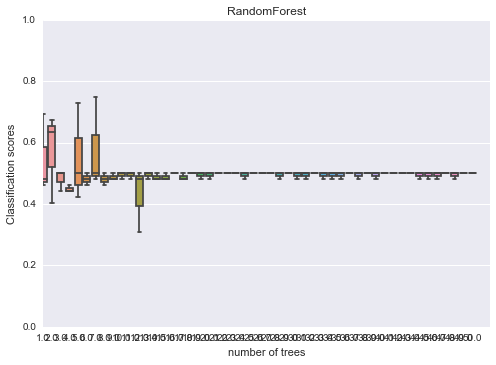

[[  11.    25.9   30.3 ...,   33.7   23.9  111. ]
 [   1.    27.    31.5 ...,   36.5   25.   116. ]
 [  21.    28.9   34.6 ...,   31.6   21.7  115. ]
 ..., 
 [  21.    22.2    0.  ...,    0.     0.   110. ]
 [  11.    17.7    0.  ...,    0.     0.   100. ]
 [   1.    17.2    0.  ...,    0.     0.   310. ]]
成功
C:\Users\Aaron\weather\東方果實蠅屏東縣麟洛鄉.csv
data_organization_ 4  **  4 3


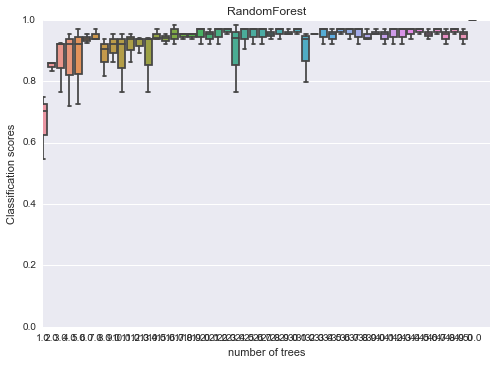

[[  11.    26.2   30.6 ...,   33.7   25.1    8. ]
 [   1.    27.2    0.  ...,    0.     0.    36. ]
 [  21.    28.3   32.1 ...,    0.     0.     3. ]
 ..., 
 [  11.    18.7   24.5 ...,   24.2   10.7  356. ]
 [  11.    18.7   24.5 ...,   24.2   10.7  356. ]
 [  11.    18.7   24.5 ...,   24.2   10.7  356. ]]
成功
C:\Users\Aaron\weather\東方果實蠅苗栗縣三灣鄉.csv
data_organization_ 4  **  4 3


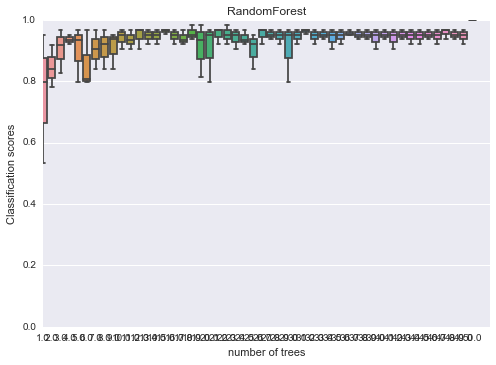

[[  11.    21.5   26.9 ...,   30.5   19.7    0. ]
 [   1.    21.2   24.2 ...,   30.7   22.1  233. ]
 [  21.    25.5   33.4 ...,   25.2   16.     0. ]
 ..., 
 [  11.    17.2   21.6 ...,   27.2   18.2   47. ]
 [  11.    17.2   21.6 ...,   27.2   18.2   47. ]
 [  11.    17.2   21.6 ...,   27.2   18.2   47. ]]
成功
C:\Users\Aaron\weather\東方果實蠅苗栗縣公館鄉.csv
data_organization_ 4  **  4 3


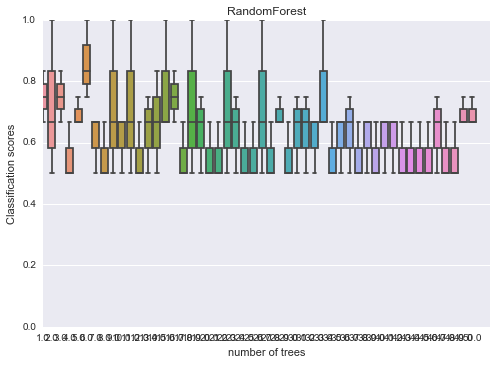

[[  21.    27.4   33.1   22.3  221.    22.    27.3   31.3   24.   211.
    23.    26.5   31.6   22.7  260.    24.    25.    30.6   21.6  215.
    25.    24.2   28.1   21.9  122.    26.    26.    30.3   22.7  213.
    27.    26.3   31.6   22.   221.    28.    23.2   26.5   19.6  321.
    29.    22.1   28.4   17.3  340.    30.    21.2   25.3   17.8   76. ]
 [  11.    20.1   22.5   18.7  311.    12.    20.9   24.8   18.7  338.
    13.    22.9   27.1   19.3  207.    14.    22.     0.     0.    58.
    15.    20.7   23.5   19.   319.    16.    25.8   30.8   18.9  198.
    17.    25.1   30.2   22.8   43.    18.    19.5   25.5   15.8  337.
    19.    21.2   27.1   15.2    6.    20.    23.2    0.     0.   332. ]
 [   1.    21.3    0.     0.   314.     2.    22.7    0.     0.   301.
     3.    25.9    0.     0.   242.     4.    24.4   29.5   21.4    6.
     5.    21.8   28.5   19.6   11.     6.    24.6   33.6   19.3  196.
     7.    27.    32.2   23.3  269.     8.    24.    29.7   21.5  312.
  

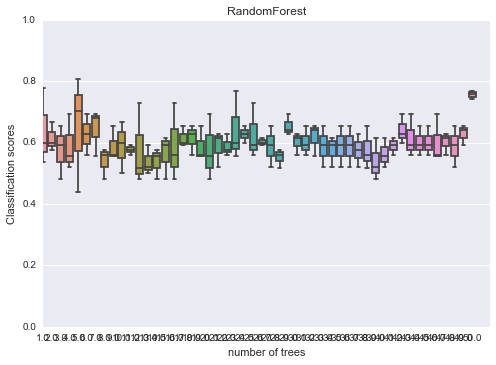

[[  11.    24.1   27.5 ...,   28.5   21.7  132. ]
 [   1.    21.3   24.2 ...,   30.    21.4  190. ]
 [  21.    26.1   31.8 ...,   25.3   18.3  261. ]
 ..., 
 [  11.    21.4   26.6 ...,   26.2   13.7  115. ]
 [  11.    21.4   26.6 ...,   26.2   13.7  115. ]
 [  11.    21.4   26.6 ...,   26.2   13.7  115. ]]
成功
C:\Users\Aaron\weather\東方果實蠅桃園市大溪區.csv
data_organization_ 4  **  4 3


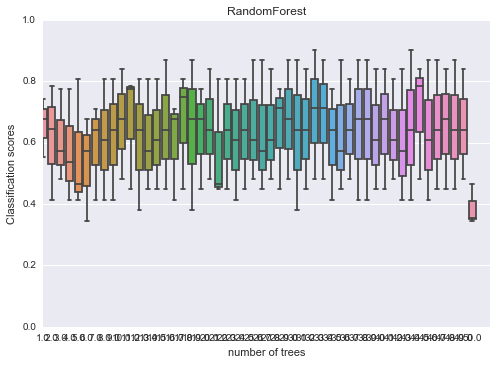

[[  11.    21.2   24.7 ...,   29.4   21.3  135. ]
 [   1.    22.1   25.6 ...,   31.2   23.1   14. ]
 [  21.    26.6   33.  ...,   27.5   18.     2. ]
 ..., 
 [  21.    19.    23.8 ...,   23.    12.3   45. ]
 [  11.    17.    22.6 ...,   22.2   11.7  339. ]
 [   1.    12.2   12.8 ...,   15.    12.2   55. ]]
成功


In [18]:
di = read_data()
count_round_t  = 1
count_round = 0
di_count = 0
for dia in di:
    di_count = di_count +1
    filename = ('C:\\Users\\Aaron\\weather\\東方果實蠅'+ dia[0]+ dia[1]+'.csv')
    if os.path.isfile(filename):
        
        count_round = count_round + 1
        filename = ('C:\\Users\\Aaron\\weather\\東方果實蠅'+ dia[0]+ dia[1]+'.csv')
        X, y = open_data(filename, dia, 4, 4, 3)
        #rawX_to_plotbox(X, y, 4, 'RandomForest','balanced',7)
        
        X, y = make_data_balanced(X,y) 
        rawX_to_plotbox(X, y, 4,7)
        #rawX_to_plotbox(X, y, 4,8)
        #rawX_to_plotbox(X, y, 4,9)
        #rawX_to_plotbox(X, y, 4,10)
        print(X)


#        if di_count == :
#            break
        print('成功')

In [13]:
def predict_weather(X, y, predict_X):
    import statistics
    
    #當 day == 7時:
    X = np.array(X)
    y = np.array(y)
    predict_X = np.array(predict_X)
        
    data = X
    k = pd.DataFrame(data=data[0:,0:],    # values
                  index=range(len(data[0:])),    # 1st column as index
                  columns=range(len(data[0]))) 
    score = []
    predict = []
    time = 10
    repeat = 10
    prediction = 0
    city_name = ''
    score_standard_deviation = 0
    column = ['病蟲害','縣市名稱','時間','規模','誤差','規模初級','規模等比','等級數量']
    DF = pd.DataFrame(columns=column)
    for pests in ['東方果實蠅']:
        for row_predict_X in predict_X:
            print(row_predict_X)
            city_name = row_predict_X[0] + row_predict_X[1]
            for day in [1, 2, 3]:
                for row_X in X:
                    np.delete(row_X, np.s_[-(day)*3:])
                for row_predict_X in predict_X:
                    np.delete(row_predict_X, np.s_[-(day)*3:])
                    
                for val in range(30,30+time):
                    clf = RandomForestClassifier(n_estimators = val)
                    for repeata in range(repeat):
                        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
                        score.append(clf.fit(X_train[2:],y_train).score(X_test[2:], y_test))
                        predict.append(clf.fit(X_train[2:],y_train).predict(row_predict_X[2:]))
                for i in range(time):
                    clf = SVC(C=1,gamma=1)
                    for repeata in range(repeat):
                        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
                        score.append(clf.fit(X_train,y_train).score(X_test, y_test))
                        predict.append(clf.fit(X_train,y_train).predict(row_predict_X[2:]))
                # 投票機制採用 score 平方加權
                weight = [i**2 for i in score]
                prediction = sum([weight[i]*predict[i] for i in range(len(score))])/sum(weight)
                score_standard_deviation = statistics.stdev(score)
                DF2=pd.DataFrame([[pests, city_name, day, prediction, score_standard_deviation]], columns=column)
                DF = DF.append(DF2, ignore_index=True)
                

    return DF

In [12]:
di = read_data()
predict_d = []
predict_d.append(['台中市', '后里區', '18', '28.0', '33.0', '25.2', '41', '19', '27.9', '32.2', '25.9', '197', '20', '28.5', '33.1', '25.0', '200', '21', '29.1', '32.5', '26.6', '5', '22', '29.6', '', '', '3', '23', '29.5', '', '', '36', '24', '30.0', '', '', '8'])

predict_d.append(['台中市', '和平區', '18', '28.0', '33.4', '24.3', '36', '19', '27.6', '32.3', '25.3', '156', '20', '28.4', '33.3', '24.4', '162', '21', '29.0', '32.4', '26.2', '14', '22', '29.3', '', '', '347', '23', '29.6', '', '', '174', '24', '30.0', '', '', '174'])
predict_e = []
for i in predict_d:
    sub_buffer = []
    sub_buffer.append(i[0])
    sub_buffer.append(i[1])
    for j in range(len(i)):
        if j >= 2:
            sub_buffer.append(i[j])
predict_weather(X,y,predict_d)

['台中市' '后里區' '18' '28.0' '33.0' '25.2' '41' '19' '27.9' '32.2' '25.9' '197'
 '20' '28.5' '33.1' '25.0' '200' '21' '29.1' '32.5' '26.6' '5' '22' '29.6'
 '' '' '3' '23' '29.5' '' '' '36' '24' '30.0' '' '' '8']


ValueError: Number of labels=132 does not match number of samples=130

In [ ]:
predict_d